In [1]:
import os
import pandas as pd 
from datetime import datetime
import seaborn as sns
from src.utils.general import get_db_conn
import matplotlib.pyplot as plt

In [2]:
creds_folder = '../../conf/local/'
fpath = os.path.join(creds_folder, 'credentials.yaml')
db_con = get_db_conn(fpath)

#### How long does it take for a bill to get passed?

In [24]:
q = """
    with passed_bills as (
        select distinct on (bill_id) 
            bill_id , progress_date as passed_date
        from clean.bill_progress bp
        where "event" = 4
        order by bill_id, progress_date
    )
    select 
        bill_id, introduced_date, passed_date, state, session_id, (passed_date - introduced_date) as days_to_pass
    from passed_bills left join clean.bills using(bill_id)
"""

passed_bills = pd.read_sql(q, db_con)

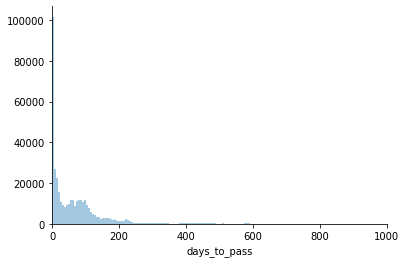

In [25]:
fig, ax = plt.subplots()
sns.distplot(passed_bills['days_to_pass'], kde=False, bins=700)
ax.set_xlim([-1, 1000])
sns.despine()

#### Whats the fraction of bills that pass? (approximately)

In [19]:
q = "select count(distinct(bill_id)) from clean.bills;"

bill_count = pd.read_sql(q, db_con).at[0, 'count']

In [23]:
passed_percent = len(passed_bills) / bill_count
passed_percent

0.25834410450125317

**NOTE** -- The actual figure can be slightly higher than that as we are counting bills that are still active in the denominator

#### What percentage of bills pass within a year, given they pass?

In [26]:
msk = passed_bills['days_to_pass'] <= 365

len(passed_bills[msk]) / len(passed_bills)

0.9695906815595193